In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [3]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

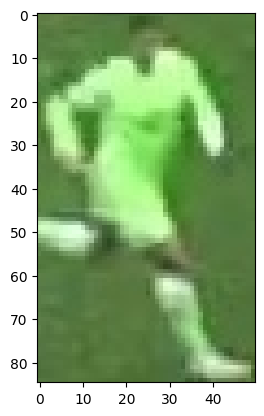

In [4]:
plt.imshow(image)
plt.show()

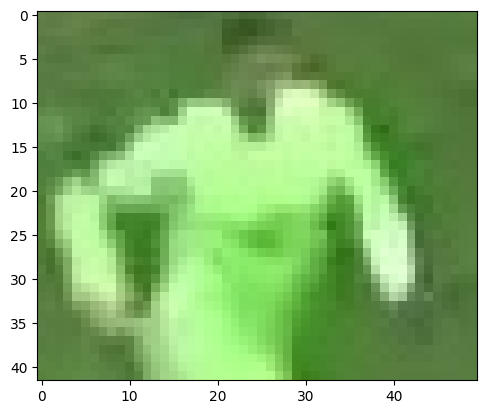

In [5]:
# taking top half of the player image, easy for segmentation and finding color

top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

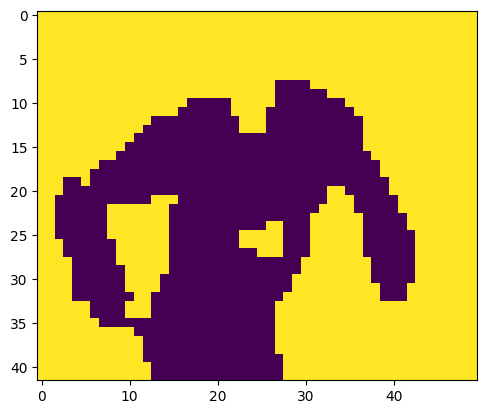

In [6]:
#cluster image into 2

#reshape img into 2d array
image_2d = top_half_img.reshape(-1, 3)

#perfomr k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#get cluster labels
labels = kmeans.labels_

#reshape labels into original image shape
clustrered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

#display results
plt.imshow(clustrered_img)
plt.show()

In [7]:
corner_cluster = [clustrered_img[0, 0], clustrered_img[0, -1], clustrered_img[-1, 0], clustrered_img[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print('Non player cluster:', non_player_cluster)

Non player cluster: 1


In [8]:
player_cluster = 1 - non_player_cluster


In [9]:
kmeans.cluster_centers_[player_cluster]

array([171.05408971, 235.43667546, 142.72823219])